In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

%matplotlib inline

In [6]:
boston_dataset = load_boston()

In [8]:
dataset = pd.DataFrame(data=boston_dataset.data, columns = boston_dataset.feature_names)

In [9]:
dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [10]:
dataset['target'] = boston_dataset.target

In [11]:
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [12]:
dataset_corr = dataset.corr()

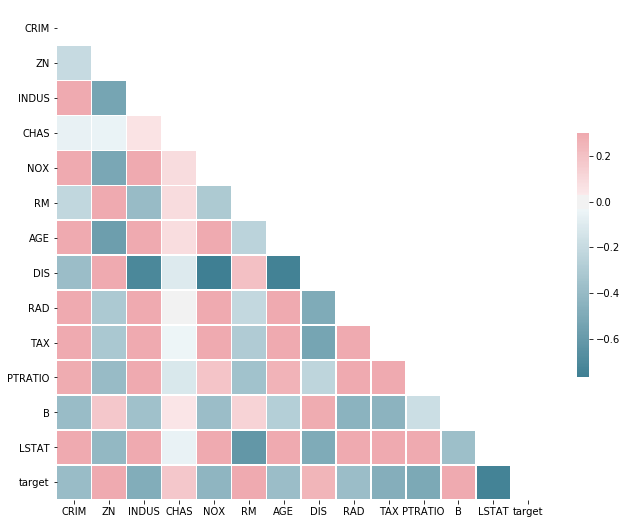

In [13]:
# Generate a mask for the upper triangle
mask = np.zeros_like(dataset_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dataset_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
from scipy.stats.stats import pearsonr

In [27]:
print('Correlação ', pearsonr(dataset['RM'], dataset['target'])[0])

Correlação  0.6953599470715394


In [28]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]

In [29]:
y_range = [dataset['target'].min(), dataset['target'].max()]

In [33]:
model = linear_model.LinearRegression(normalize=False, fit_intercept=True)

num_observ = len (dataset)
x = dataset['RM'].values.reshape((num_observ, 1))
y = dataset['target'].values

model.fit(x, y)
predicts = model.predict(x)

model.score(x, y)

0.4835254559913343

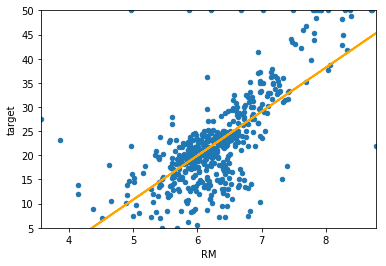

In [35]:
scatter_plot = dataset.plot(kind='scatter', x='RM', y ='target', xlim= x_range, ylim= y_range)
regression_line = scatter_plot.plot(dataset['RM'], predicts, '-', color='orange', linewidth=2)

In [36]:
sum_squared_regression = pd.Series(predicts - dataset['target'].mean()) ** 2
SSR = np.sum(sum_squared_regression)
SSR

20654.416218807964

---------------------------------------------------------------------------------------------------------
EXERCICIO
Gerar uma regressão linear do conjunto de dados "sales"...
Olhar no gráfico de correlação e ver os campos que mais relacionam (> 0.2), e gerar um modelo para eles.

In [81]:
sales_df = pd.read_csv('sales.csv')
sales_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


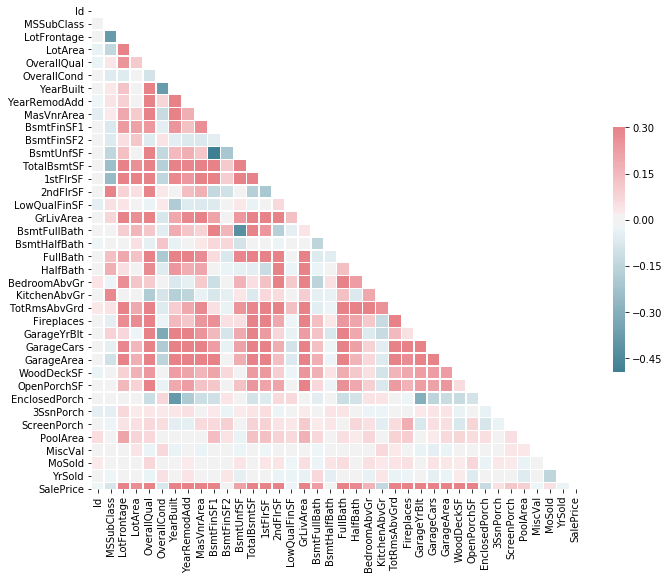

In [104]:
df_correl = sales_df.corr()

#for index in df_correl.index:
#    df_correl.loc[(df_correl[index] < 0.2), index] = float("NaN")

#df_correl = df_correl.dropna(how='all')
#df_correl = df_correl.dropna(how='all', axis=1)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_correl, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_correl, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
df_correl.loc[(df_correl['OverallQual'] > 0.2)] 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,NaN,NaN,1.000000,0.426095,0.251646,NaN,NaN,NaN,NaN,0.233633,...,NaN,NaN,NaN,NaN,NaN,0.206167,NaN,NaN,NaN,0.351799
OverallQual,NaN,NaN,0.251646,NaN,1.000000,NaN,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,0.315707,0.249503,...,0.224880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,...,0.205726,0.226298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,0.411876,NaN,0.315707,NaN,1.000000,0.264736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.477493
BsmtFinSF1,NaN,NaN,0.233633,0.214103,0.239666,NaN,0.249503,NaN,0.264736,1.000000,...,0.204306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386420
BsmtUnfSF,NaN,NaN,NaN,NaN,0.308159,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214479
TotalBsmtSF,NaN,NaN,0.392075,0.260833,0.537808,NaN,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613581
1stFlrSF,NaN,NaN,0.457181,0.299475,0.476224,NaN,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605852
2ndFlrSF,NaN,0.307886,NaN,NaN,0.295493,NaN,NaN,NaN,NaN,NaN,...,NaN,0.208026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.319334


Correlação  OverallQual  x SalePrice :  0.790981600583805
Correlação  TotalBsmtSF  x SalePrice :  0.6135805515591953


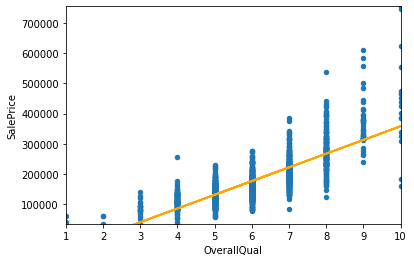

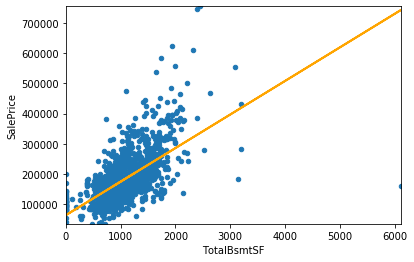

In [105]:
from scipy.stats.stats import pearsonr

def montar_modelo(campoX, campoY):
    
    print('Correlação ', campoX, ' x', campoY, ': ' , pearsonr(sales_df[campoX], sales_df[campoY])[0])

    model = linear_model.LinearRegression(normalize=False, fit_intercept=True)

    num_observ = len (sales_df)
    x = sales_df[campoX].values.reshape((num_observ, 1))
    y = sales_df[campoY].values

    model.fit(x, y)
    predicts = model.predict(x)

    model.score(x, y)
    
    x_range = [sales_df[campoX].min(), sales_df[campoX].max()]
    y_range = [sales_df[campoY].min(), sales_df[campoY].max()]

    scatter_plot = sales_df.plot(kind='scatter', x=campoX, y =campoY, xlim= x_range, ylim= y_range)
    regression_line = scatter_plot.plot(sales_df[campoX], predicts, '-', color='orange', linewidth=2)

# -----------------------------

campoX = ["OverallQual", "TotalBsmtSF"]
campoY = ["SalePrice", "SalePrice"]

for i in range(0, len(campoX)):
    montar_modelo(campoX[i], campoY[i])
    